In [46]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, f1_score, roc_auc_score,roc_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score

1.Time: Time elapsed since the first transaction. 2.V1-V28: These columns are likely anonymized features
resulting from a dimensionality reduction technique like Principal Component Analysis (PCA) to protect user
privacy. 3.Amount: The transaction amount. 4.Class: A binary indicator (0 or 1) representing whether the
transaction is a fraudulent one (1) or not (0).

In [47]:
# loading the dataset to a Pandas Dataframe
credit_card_data=pd.read_csv('C:/Users/user/Downloads/New folder (2)/creditcard.csv')

In [48]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [49]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Data preprocessing

In [50]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [51]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [52]:
# separating the data for analysis
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]

In [53]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [54]:
# statistical measures ofthe data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [55]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [56]:
#compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under Sampling  

Build a smaple data set containing a similar distribution of normal transactions and fradulent transactions

Numbr of fradulent transactions ----> 492

In [57]:
legit_sample=legit.sample(n=492)

Concating the two Dataframes

In [58]:
new_dataset=pd.concat([legit_sample,fraud], axis=0)                                                                                                                         

In [59]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
81352,58900.0,-2.509841,-2.889667,2.154073,-1.240203,0.951599,-0.335229,-0.772903,0.089254,-0.204492,...,0.133621,0.564540,-0.309717,-0.293534,0.191091,-0.221794,-0.184487,-0.386282,209.88,0
79805,58187.0,-3.405931,-0.900032,-0.440663,0.062850,-3.455296,0.456957,1.270366,0.907224,0.471786,...,-0.259362,-0.058735,0.857338,0.492835,-0.686030,0.685539,0.510492,-0.845593,497.79,0
146266,87573.0,-0.359429,1.282673,1.013395,2.711956,1.246030,0.943635,0.859482,0.225879,-1.866359,...,0.106661,0.197469,-0.263002,-1.085391,-0.181344,0.026079,0.119534,0.147694,27.38,0
57303,47850.0,1.276154,-0.021665,0.375169,0.114660,-0.691904,-1.103812,-0.083897,-0.175668,0.334519,...,-0.098601,-0.316517,0.038202,0.430681,0.227739,0.949730,-0.086720,0.004067,10.00,0
77806,57217.0,1.254125,0.220440,-0.201335,0.570280,-0.172319,-1.327803,0.481608,-0.357057,-0.149203,...,-0.018929,-0.099747,-0.124138,0.425049,0.640613,0.534109,-0.080309,0.002087,29.90,0


In [60]:
#It give fraudluent dataset
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [61]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [62]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,87730.552846,0.032728,0.013967,0.144084,0.066516,-0.053044,-0.040113,-0.032601,-0.034923,0.024906,...,-0.051862,-0.031448,-0.026346,0.029362,-0.018064,0.018847,0.033207,0.013974,0.001269,78.904126
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Data Visualization

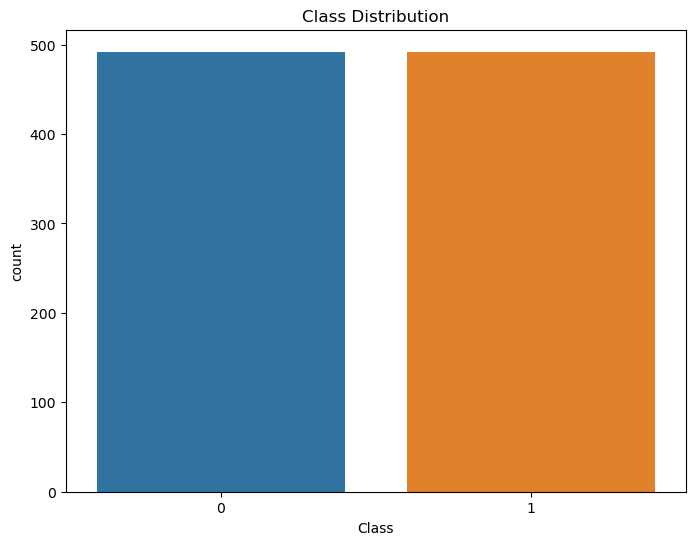

In [63]:
# Visualize class distribution
class_counts = new_dataset['Class'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=new_dataset)
plt.title("Class Distribution")
plt.show()



 Visualize the distribution of Amount and Time features for both classes

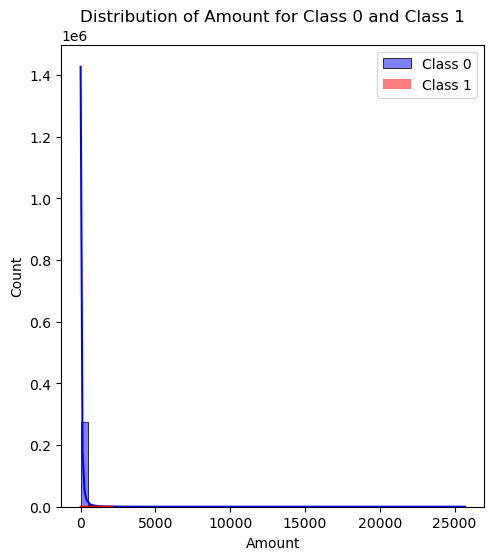

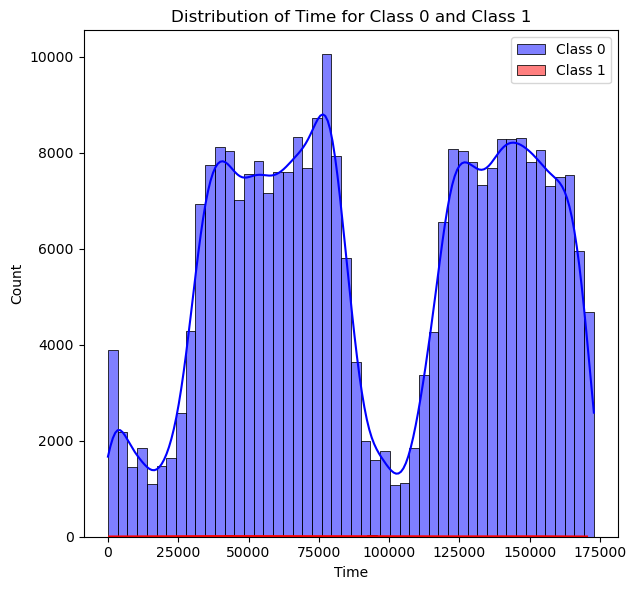

In [64]:

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.histplot(credit_card_data[credit_card_data['Class'] == 0]['Amount'], bins=50, kde=True, color='blue', label='Class 0')
sns.histplot(credit_card_data[credit_card_data['Class'] == 1]['Amount'], bins=50, kde=True, color='red', label='Class 1')
plt.title('Distribution of Amount for Class 0 and Class 1')
plt.legend()



plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.histplot(credit_card_data[credit_card_data['Class'] == 0]['Time'], bins=50, kde=True, color='blue', label='Class 0')
sns.histplot(credit_card_data[credit_card_data['Class'] == 1]['Time'], bins=50, kde=True, color='red', label='Class 1')
plt.title('Distribution of Time for Class 0 and Class 1')
plt.legend()
plt.tight_layout()
plt.show()

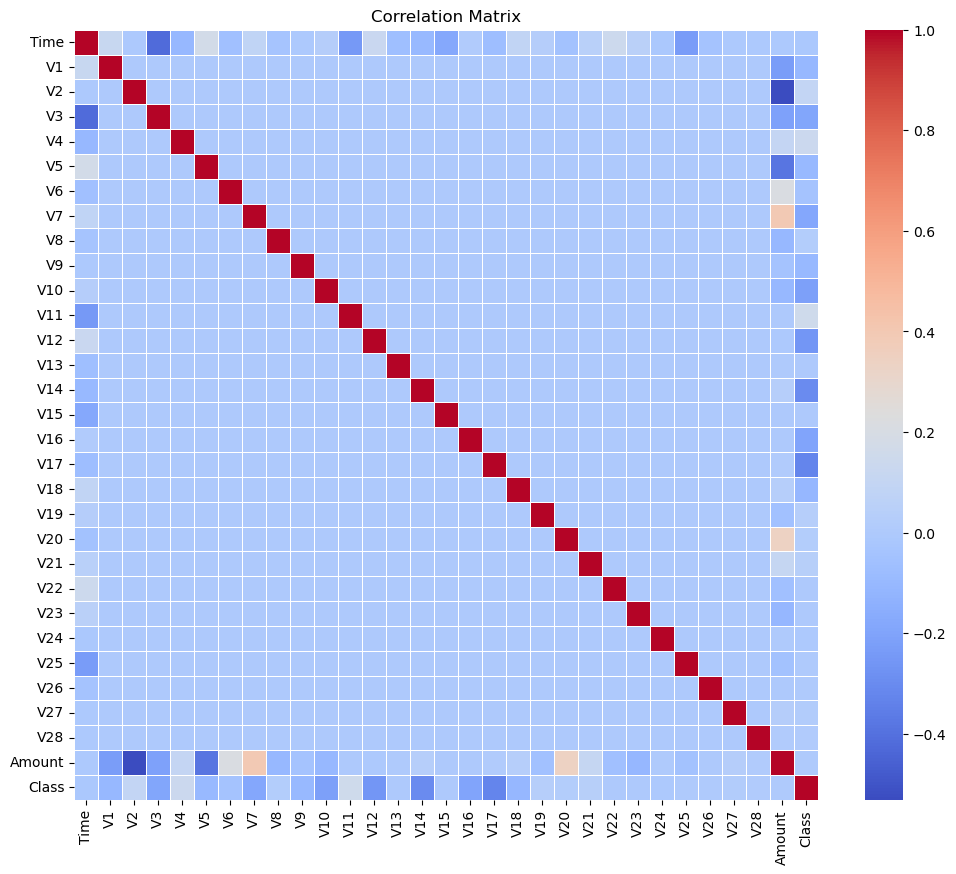

In [65]:
#Visulaize correlation matix
corr_matrix = credit_card_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Splittig the data into features and Targets 

In [66]:
x=new_dataset.drop(columns='Class',axis=1)
y=new_dataset['Class']

In [67]:
print(x)  

            Time        V1        V2        V3        V4        V5        V6  \
81352    58900.0 -2.509841 -2.889667  2.154073 -1.240203  0.951599 -0.335229   
79805    58187.0 -3.405931 -0.900032 -0.440663  0.062850 -3.455296  0.456957   
146266   87573.0 -0.359429  1.282673  1.013395  2.711956  1.246030  0.943635   
57303    47850.0  1.276154 -0.021665  0.375169  0.114660 -0.691904 -1.103812   
77806    57217.0  1.254125  0.220440 -0.201335  0.570280 -0.172319 -1.327803   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [68]:
print(y)

81352     0
79805     0
146266    0
57303     0
77806     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

Precision: 0.9425
Recall: 0.8367
F1-score: 0.8865
AUC-ROC: 0.8931


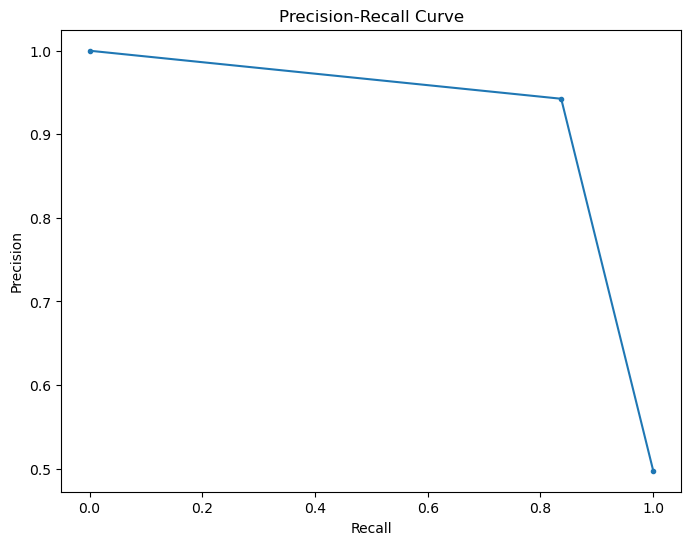

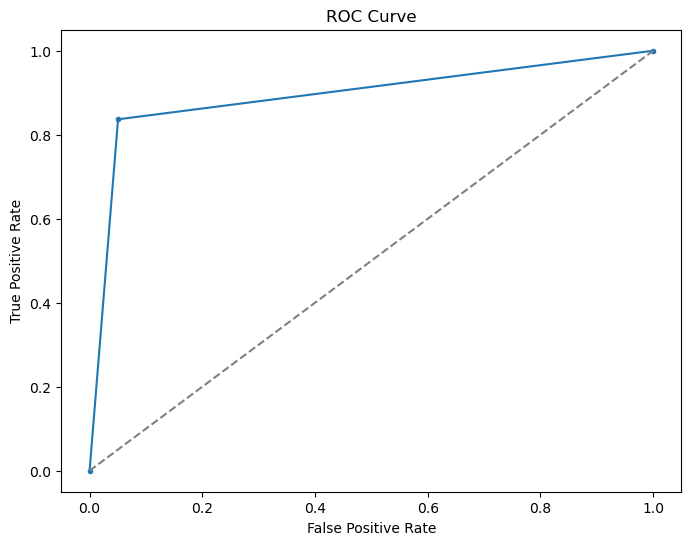

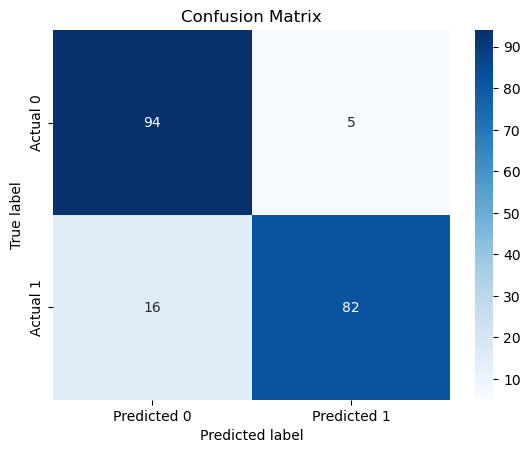

In [70]:
#import matplotlib.pyplot as plt
#from sklearn.metrics import precision_recall_curve, f1_score, roc_auc_score, roc_curve,
#from sklearn.metrics import precision_score, recall_score, accuracy_score
#import seaborn as sns
#from sklearn.linear_model import DecisionTreeClassifier()
#from sklearn.model_selection import train_test_split
#this above packages are reqiured to implementing model evaluation
# Assuming you have X_train, X_test, Y_train, Y_test from the previous code
# Train the DecisionTreeClassifier model
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
# Predict probabilities for the positive class
y_probs = model.predict_proba(x_test)[:, 1]
# Threshold for classification (you can adjust this based on your preference)
threshold = 0.5
y_pred = (y_probs > threshold).astype(int)
# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_probs)
# Print metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')
# Visualize Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
# Visualize ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
# Visualize Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Modelevalutaion

Checking the accuracy of train and test data

In [71]:
from sklearn.tree import DecisionTreeClassifier                                                                                                                                                                                                                                                                                                                                                                                                                             
from sklearn.metrics import accuracy_score

In [72]:
#Split the data into training data and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, stratify=y, random_state=2)

In [73]:
print(x.shape, x_train.shape, x_test.shape)

(984, 30) (787, 30) (197, 30)


In [74]:
#Create a decision tree model with pruning parameters
model = DecisionTreeClassifier(random_state=42,max_depth=5,min_samples_split=10,min_samples_leaf=5)
# training the logistic regression model with training data
model.fit(x_train, y_train)
#accuracy on training data
x_train_prediction=model.predict(x_train)
training_data_accuracy= accuracy_score(x_train_prediction, y_train)
# accuracy on test data
x_test_prediction=model.predict(x_test)
test_data_accuracy= accuracy_score(x_test_prediction, y_test)

In [75]:
print('Accuracy on Training data:',training_data_accuracy)

Accuracy on Training data: 0.9695044472681067


In [76]:
print('Accuracy on Testing data:',test_data_accuracy)

Accuracy on Testing data: 0.9035532994923858
